# check preprocessed `haloflow2` data sets

In [1]:
import os
import numpy as np 
from astropy.table import Table, vstack
from astropy.table import join as aJoin

from tqdm import trange

In [2]:
# -- plotting -- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
dat_dir = '/xdisk/chhahn/chhahn/haloflow/hf2/'

tng50 = Table.read(os.path.join(dat_dir, 'hf2.TNG50.morph_subhalo.csv'))
tng100 = Table.read(os.path.join(dat_dir, 'hf2.TNG100.morph_subhalo.csv'))
eagle = Table.read(os.path.join(dat_dir, 'hf2.Eagle100.morph_subhalo.csv'))
simba = Table.read(os.path.join(dat_dir, 'hf2.Simba100.morph_subhalo.csv'))

In [6]:
tng50.info()

<Table length=7464>
             name              dtype     class     n_bad
----------------------------- ------- ------------ -----
                      SnapNum   int64       Column     0
                    SubfindID   int64       Column     0
        SubhaloMassType_stars float64       Column     0
              Group_M_Crit200 float64       Column     0
                       Camera    str2       Column     0
                     Redshift float64       Column     0
                 Sersic_mag_g float64       Column     0
                  Sersic_re_g float64       Column     0
                Sersic_nser_g float64       Column     0
               Sersic_axrat_g float64       Column     0
                 Sersic_ang_g float64       Column     0
                  Asymmetry_g float64       Column     0
        RMSAsymmetrySquared_g float64       Column     0
        AsymmetryNoAperture_g float64       Column     0
   Concentration_Elliptical_g float64       Column     0
           

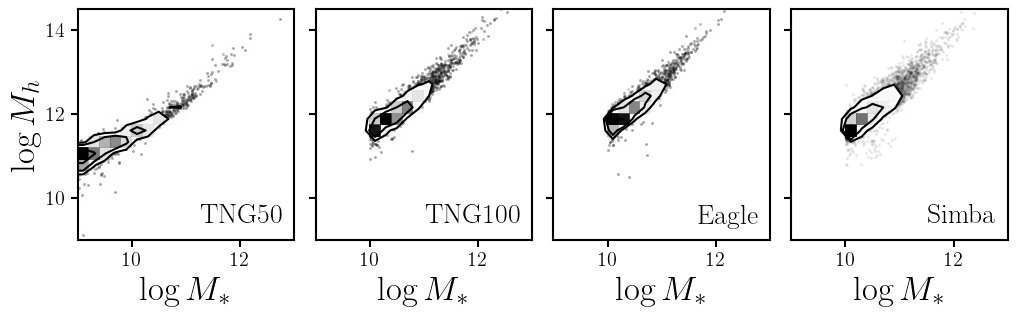

In [8]:
fig = plt.figure(figsize=(12,3))
for i, sim in enumerate([tng50, tng100, eagle, simba]): 
    sub = fig.add_subplot(1,4,i+1)

    _ = DFM.hist2d(sim['SubhaloMassType_stars'], sim['Group_M_Crit200'], range=[(9., 13.), (9., 14.5)])
    sub.text(0.95, 0.05, ['TNG50', 'TNG100', 'Eagle', 'Simba'][i], transform=sub.transAxes, ha='right', va='bottom', fontsize=20)
    if i > 0: sub.set_yticklabels([])
        
#     if i == 0: sub.legend(loc='lower right', fontsize=18)
    if i > 0: sub.set_yticklabels([])
    if i == 0: sub.set_ylabel(r'$\log M_h$', fontsize=25)
    sub.set_xlabel(r'$\log M_*$', fontsize=25)
    
fig.subplots_adjust(wspace=0.1)

# check hf2 loading in data module 

In [18]:
import os
os.environ['machine'] = 'puma'

In [19]:
from haloflow import data as D

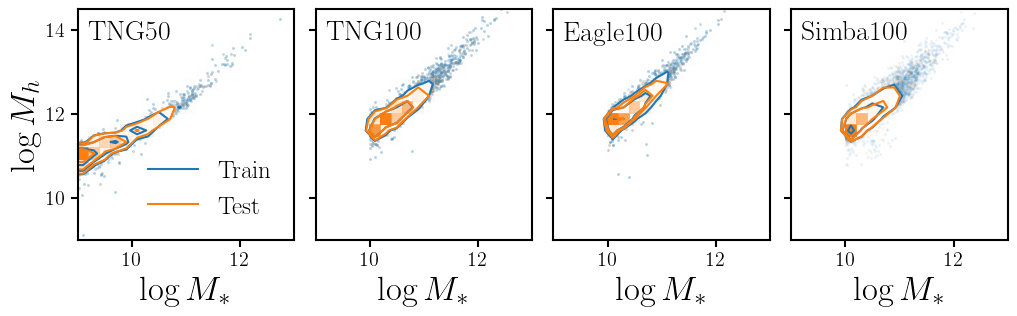

In [20]:
fig = plt.figure(figsize=(12,3))
for i, sim in enumerate(['TNG50', 'TNG100', 'Eagle100', 'Simba100']): 
    sub = fig.add_subplot(1,4,i+1)

    Y_train, _ = D.hf2_centrals('train', 'mags', sim=sim)
    Y_test, _ = D.hf2_centrals('test', 'mags', sim=sim)

    _ = DFM.hist2d(Y_train[:,0], Y_train[:,1], range=[(9., 13.), (9., 14.5)], color='C0')
    _ = DFM.hist2d(Y_test[:,0], Y_test[:,1], range=[(9., 13.), (9., 14.5)], color='C1') 
    
    sub.plot([], [], label='Train')
    sub.plot([], [], label='Test')    
    sub.text(0.05, 0.95, sim, transform=sub.transAxes, ha='left', va='top', fontsize=20)
    
    if i == 0: sub.legend(loc='lower right', fontsize=18)
    if i > 0: sub.set_yticklabels([])
    if i == 0: sub.set_ylabel(r'$\log M_h$', fontsize=25)
    sub.set_xlabel(r'$\log M_*$', fontsize=25)
fig.subplots_adjust(wspace=0.1)

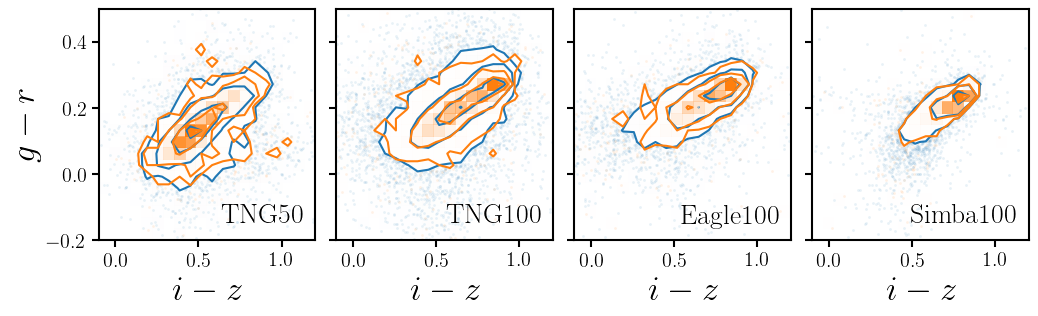

In [21]:
fig = plt.figure(figsize=(12,3))
for i, sim in enumerate(['TNG50', 'TNG100', 'Eagle100', 'Simba100']): 
    sub = fig.add_subplot(1,4,i+1)

    _, X_train = D.hf2_centrals('train', 'mags', sim=sim)
    _, X_test = D.hf2_centrals('test', 'mags', sim=sim)
    
    # g-r - i-z
    _ = DFM.hist2d(X_train[:,0] - X_train[:,1], X_train[:,2] - X_train[:,4], range=[(-0.1, 1.2), (-0.2, 0.5)], 
                   color='C0')
    _ = DFM.hist2d(X_test[:,0] - X_test[:,1], X_test[:,2] - X_test[:,4], range=[(-0.1, 1.2), (-0.2, 0.5)], 
                   color='C1')
    
    sub.plot([], [], label='Train')
    sub.plot([], [], label='Test')       
    sub.text(0.95, 0.05, sim, transform=sub.transAxes, ha='right', va='bottom', fontsize=20)
    if i > 0: sub.set_yticklabels([])
    if i == 0: sub.set_ylabel(r'$g-r$', fontsize=25)
    sub.set_xlabel(r'$i-z$', fontsize=25)
    
fig.subplots_adjust(wspace=0.1)